In [31]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import wrangle
from env import user, password, host
import os

#set figure and font size
plt.rc('figure', figsize=(11, 9))

plt.rc('font', size=13)

#set seaborn color pallete
sns.set_palette('spring')
pal = sns.set_palette('spring')
print(sns.color_palette().as_hex())

['#ff24db', '#ff49b6', '#ff6d92', '#ff926d', '#ffb649', '#ffdb24']


# Regression Wrangle Exercises

## Exercises I

Let's review the steps we take at the beginning of each new module.

1. Create a new repository named `regression-exercises` in your GitHub; all of your Regression work will be housed here.
1. Clone this repository within your local `codeup-data-science` directory.
1. Create a `.gitignore` and make sure your list of 'files to ignore' includes your `env.py` file.
1. Ceate a `README.md` file that outlines the contents and purpose of your repository.
1. Add, commit, and push these two files.
1. Now you can add your `env.py` file to this repository to access the Codeup database server.
1. For these exercises, you will create `wrangle.ipynb` and `wrangle.py` files to hold necessary functions.
1. As always, add, commit, and push your work often.

## Exercises II

Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

## Acquire
- [x] Use MySQL to view database and create SQL function required to acquire data requested below.
- [X] Save SQL query and add to new_zillow_data function in wrangle.py
- [X] Create new_zillow_data function to acquire data from codeup DB using SQL query and credentials from my env file.
    - this function will return a df based on the given SQL query
- [x] Create function get_ zillow_data to acquire the zillow data and create a CSV
- [X] Do some basic univariate exploration of df.  More exploration will be done in Prepare.

### EXERCISE ONE: 
Acquire `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, `yearbuilt`, `taxamount`, and `fips` from the `zillow` database for all 'Single Family Residential' properties.

In [32]:
#code for this function can be found in my wrangle.py
wrangle.new_zillow_data()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [33]:
df = wrangle.get_zillow_data()

In [34]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [35]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.152852e+06,2.152852e+06,2.144379e+06,2.152370e+06,2.143526e+06,2.148421e+06,2.152863e+06
mean,3.287196e+00,2.230688e+00,1.862855e+03,4.618962e+05,1.960950e+03,5.634866e+03,6.048377e+03
std,9.547544e-01,9.992796e-01,1.222125e+03,6.996760e+05,2.216220e+01,8.178910e+03,2.043329e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.801000e+03,1.850000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.257000e+03,1.881702e+05,1.949000e+03,2.534980e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.276710e+05,1.958000e+03,4.108950e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.345270e+05,1.976000e+03,6.414320e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.842891e+07,2.016000e+03,1.337756e+06,6.111000e+03


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [37]:
df.shape

(2152863, 7)

array([[<AxesSubplot:title={'center':'bedroomcnt'}>,
        <AxesSubplot:title={'center':'bathroomcnt'}>,
        <AxesSubplot:title={'center':'calculatedfinishedsquarefeet'}>],
       [<AxesSubplot:title={'center':'taxvaluedollarcnt'}>,
        <AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'center':'taxamount'}>],
       [<AxesSubplot:title={'center':'fips'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

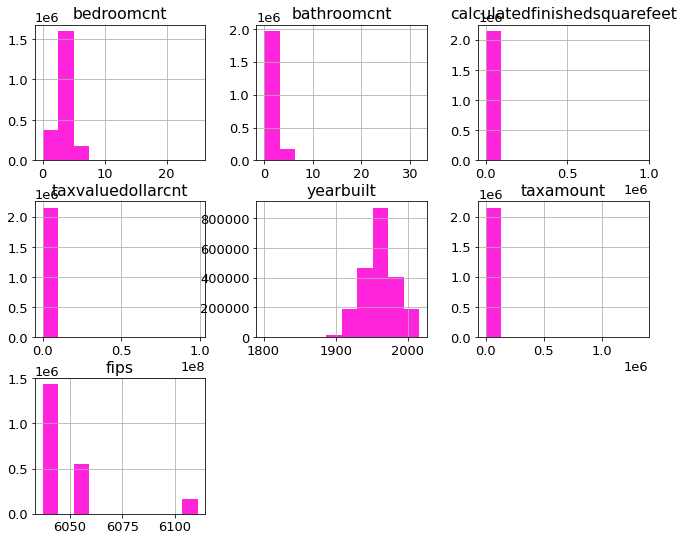

In [38]:
df.hist()

In [39]:
#rename columns
df = df.rename(columns = {'bedroomcnt': 'bedrooms', 
                           'bathroomcnt':'bathrooms',
                           'calculatedfinishedsquarefeet': 'square_feet',
                           'taxvaluedollarcnt':'tax_value',
                           'yearbuilt':'year_built'})
df.columns

Index(['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'year_built',
       'taxamount', 'fips'],
      dtype='object')

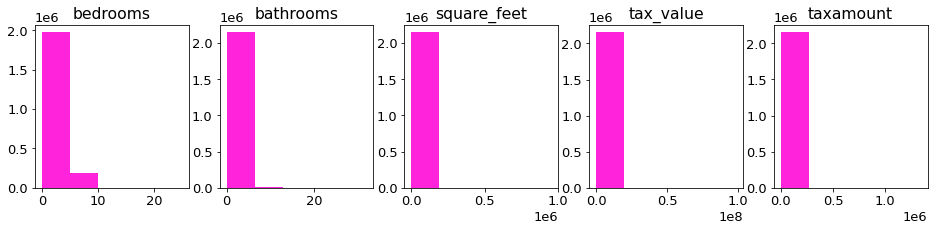

In [40]:
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
plt.show()

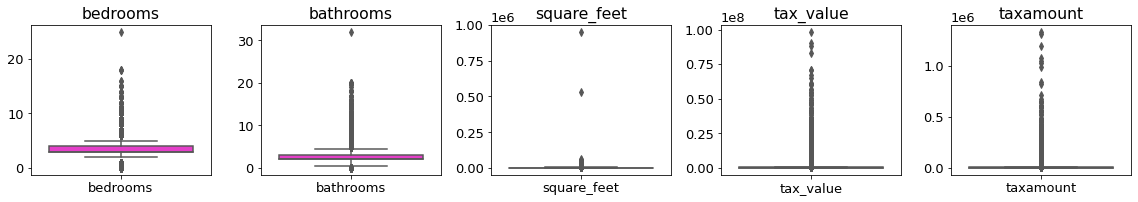

In [41]:
# List of columns
cols = ['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'taxamount']

plt.figure(figsize=(16, 3))

for i, col in enumerate(cols):

    # i starts at 0, but plot should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[[col]])

    # Hide gridlines.
    plt.grid(False)

    # sets proper spacing between plots
    plt.tight_layout()
    
plt.show()

### Acquire Takeaways:
- There appear to be some serious outliers


2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your `wrangle.ipynb` file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.

## Prepare
### Plan for Prepare:
- [] Store functions that are needed to prepare your data; make sure your module contains the necessary imports to run your code. Your final function should do the following:
    - [] Split your data into train/validate/test.
    - [x] Handle Missing Values.
    - [x] Handle outliers
    - [x] Handle erroneous data and/or outliers you wish to address.
    - [x]  Encode variables as needed or change variable type as needed.
    - [x] Create any new features, if you decided to make any for this data set.
    - [] Create function to clean data and Split data

In [42]:
#remove outliers using remove_outliers function
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [43]:
df = remove_outliers(df, 1.7, ['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'taxamount'])

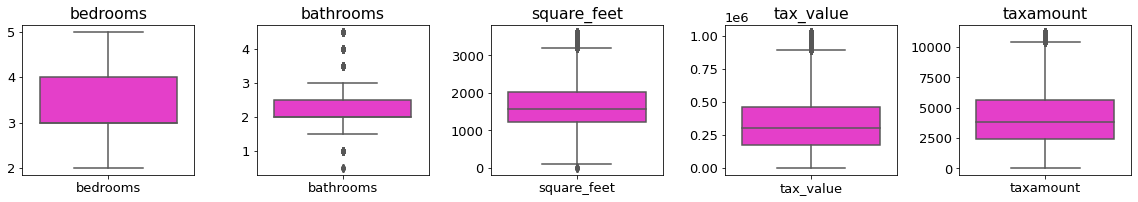

In [44]:
# List of columns
cols = ['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'taxamount']

plt.figure(figsize=(16, 3))

for i, col in enumerate(cols):

    # i starts at 0, but plot should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[[col]])

    # Hide gridlines.
    plt.grid(False)

    # sets proper spacing between plots
    plt.tight_layout()
    
plt.show()

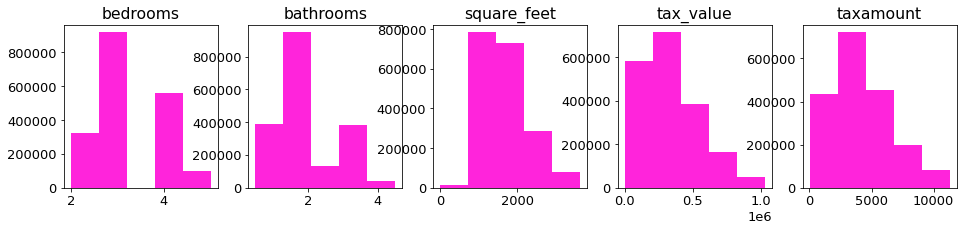

In [45]:
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
plt.show()

In [46]:
#remove whitespace
df.applymap(lambda x: x.strip() if type(x)==str else x)

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0
...,...,...,...,...,...,...,...
2152853,4.0,2.0,1987.0,259913.0,1955.0,3175.66,6059.0
2152855,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [47]:
#drop duplicates just in case
#do we do this?
#df = df.drop_duplicates()

In [48]:
df.shape

(1894536, 7)

In [49]:
df.isnull().sum()

bedrooms         0
bathrooms        0
square_feet      0
tax_value        0
year_built     910
taxamount        0
fips             0
dtype: int64

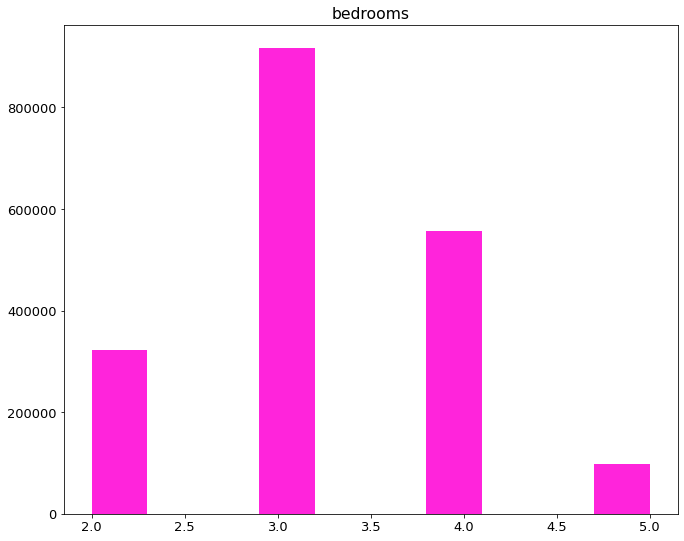

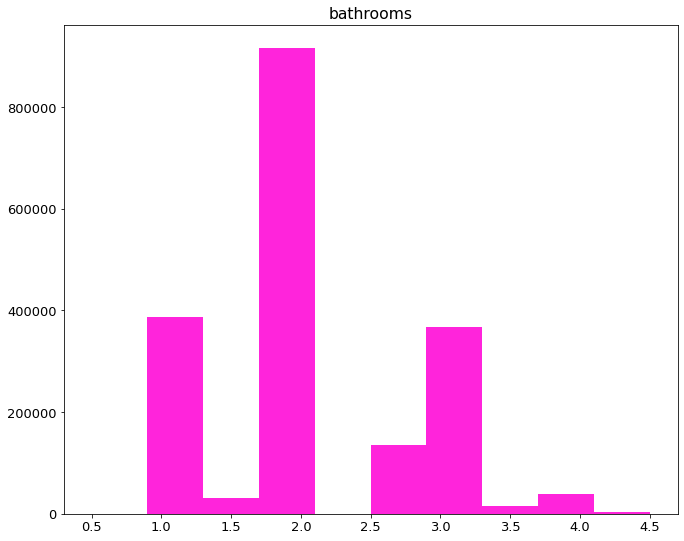

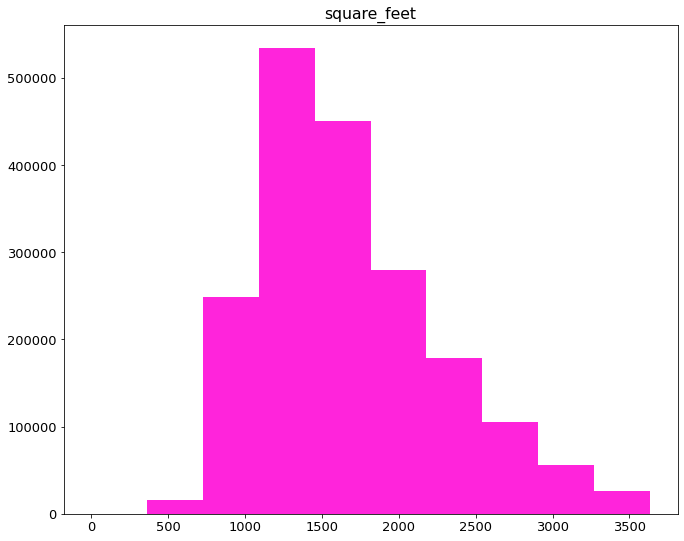

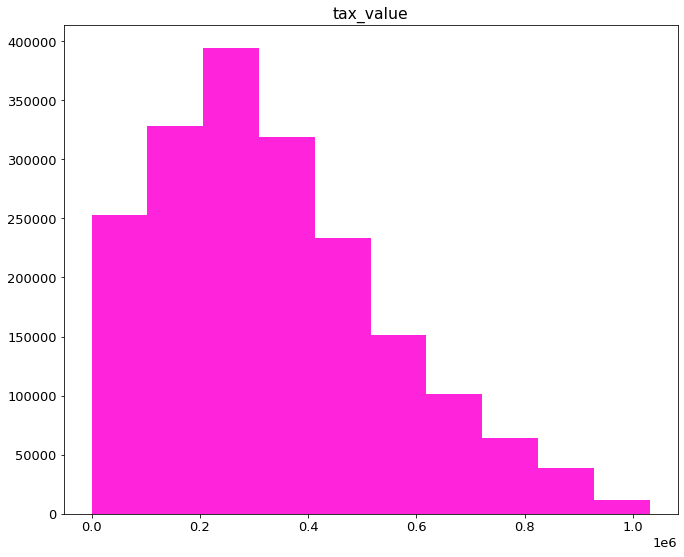

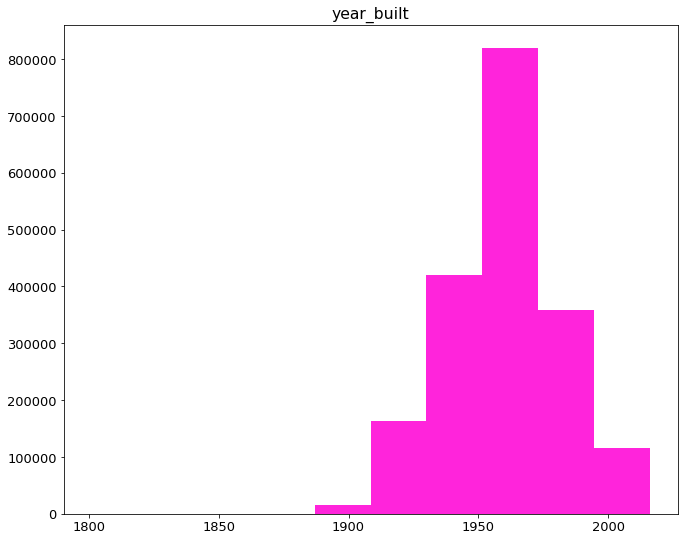

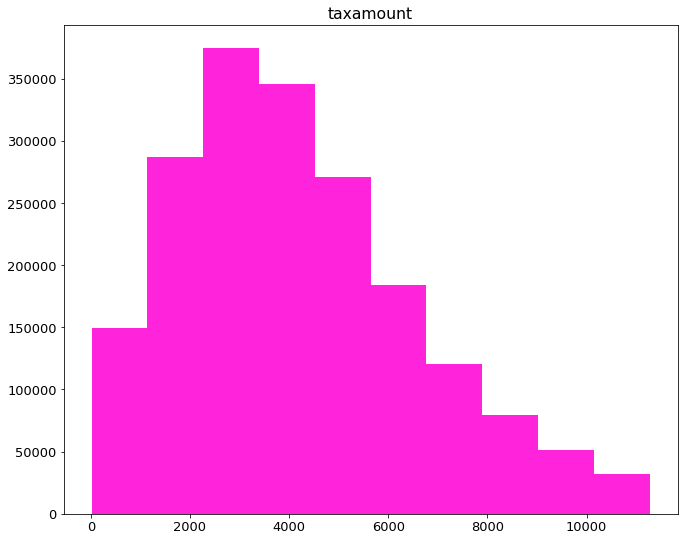

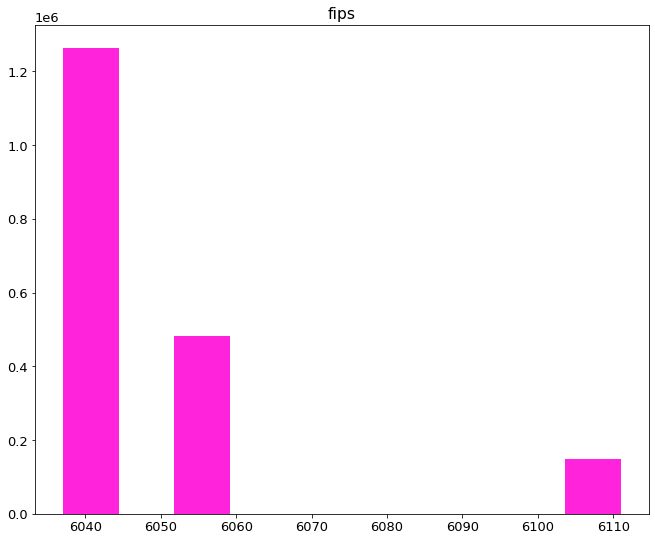

In [50]:
# plot distribution of numeric columns

# create a list of numeric column names

num_cols = df.select_dtypes(include = 'number').columns
num_cols

# loop through the list and plot a histogram for each numeric column
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [51]:
#determine if I should use impute to fill in with the mode after split
df.year_built.mode()

0    1955.0
dtype: float64

In [52]:
df.year_built.value_counts()

1955.0    80990
1950.0    67510
1954.0    66001
1953.0    59226
1956.0    58621
          ...  
1877.0        1
1823.0        1
1807.0        1
1855.0        1
1874.0        1
Name: year_built, Length: 152, dtype: int64

### Take a look at data types

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894536 entries, 6 to 2152862
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   bedrooms     float64
 1   bathrooms    float64
 2   square_feet  float64
 3   tax_value    float64
 4   year_built   float64
 5   taxamount    float64
 6   fips         float64
dtypes: float64(7)
memory usage: 115.6 MB


In [54]:
#Change fips and year_built columns to objects
df.fips = df.fips.astype(object)
df.year_built = df.year_built.astype(object)

In [55]:
#verify they are objects
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894536 entries, 6 to 2152862
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   bedrooms     float64
 1   bathrooms    float64
 2   square_feet  float64
 3   tax_value    float64
 4   year_built   object 
 5   taxamount    float64
 6   fips         object 
dtypes: float64(5), object(2)
memory usage: 115.6+ MB


In [56]:
#drop tax amount column
df = df.drop(columns=['taxamount'])

In [57]:
df.columns

Index(['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'year_built',
       'fips'],
      dtype='object')

## Split Data

In [65]:
def split_continuous(df):
    '''
    Takes in a df
    Returns train, validate, and test DataFrames
    '''
    # Create train_validate and test datasets
    train_validate, test = train_test_split(df, 
                                        test_size=.2, 
                                        random_state=123)
    # Create train and validate datsets
    train, validate = train_test_split(train_validate, 
                                   test_size=.3, 
                                   random_state=123)

    # Take a look at your split datasets

    print(f'train -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test -> {test.shape}')
    return train, validate, test

In [68]:
train, validate, test = split_continuous(df)

train -> (1060939, 6)
validate -> (454689, 6)
test -> (378908, 6)


### Impute Nulls from year_built

In [69]:
#create imputer
imputer = SimpleImputer(strategy='most_frequent')
#fit to train
imputer.fit(train[['year_built']])
#transform data
train[['year_built']] = imputer.transform(train[['year_built']])
validate[['year_built']] = imputer.transform(validate[['year_built']])
test[['year_built']] = imputer.transform(test[['year_built']])

In [70]:
train.shape, validate.shape, test.shape

((1060939, 6), (454689, 6), (378908, 6))

In [71]:
train.isnull().sum()

bedrooms       0
bathrooms      0
square_feet    0
tax_value      0
year_built     0
fips           0
dtype: int64

In [72]:
validate.isnull().sum()

bedrooms       0
bathrooms      0
square_feet    0
tax_value      0
year_built     0
fips           0
dtype: int64

In [73]:
test.isnull().sum()

bedrooms       0
bathrooms      0
square_feet    0
tax_value      0
year_built     0
fips           0
dtype: int64

In [74]:
train.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,fips
157267,3.0,1.0,1054.0,284357.0,1948.0,6037.0
72370,3.0,1.0,1438.0,254520.0,1923.0,6059.0
1763837,2.0,1.5,2114.0,765357.0,1948.0,6059.0
1788386,3.0,3.0,2016.0,468102.0,1949.0,6037.0
1645400,3.0,2.0,1655.0,443012.0,1957.0,6059.0


array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'square_feet'}>,
        <AxesSubplot:title={'center':'tax_value'}>],
       [<AxesSubplot:title={'center':'year_built'}>, <AxesSubplot:>]],
      dtype=object)

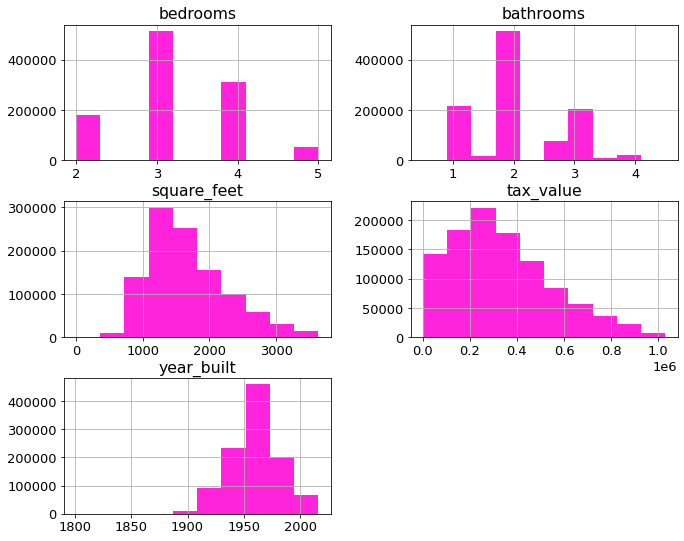

In [75]:
train.hist()

## Prepare Takeaways:
- Impute year built with mode after split 
- fips and year built need to be changed to objects
- outliers were removed with k = 1.7
- tax amount column dropped as it is based of the tax_value amount

## Exercise 3: Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your `wrangle.py` file. Name your final function `wrangle_zillow`.

In [76]:
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [77]:
def new_zillow_data():
    '''
    This function reads the zillow data from the Codeup db into a df,
    write it to a csv file, and returns the df.
    '''
    # Create SQL query.
    sql_query = """
    SELECT 
        bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, 
        taxvaluedollarcnt, yearbuilt, taxamount, fips
    FROM properties_2017
    WHERE propertylandusetypeid = 261;
    """

    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('zillow'))
    
    #rename columns
    df = df.rename(columns = {'bedroomcnt': 'bedrooms', 
                           'bathroomcnt':'bathrooms',
                           'calculatedfinishedsquarefeet': 'square_feet',
                           'taxvaluedollarcnt':'tax_value',
                           'yearbuilt':'year_built'})
    
    return df

In [78]:
def get_zillow_data():
    '''
    This function reads in zillow data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('zillow_df.csv'):
        
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('zillow_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame.
        df = new_zillow_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('zillow_df.csv')
        
    return df

In [79]:
def split_continuous(df):
    '''
    Takes in a df
    Returns train, validate, and test DataFrames
    '''
    # Create train_validate and test datasets
    train_validate, test = train_test_split(df, 
                                        test_size=.2, 
                                        random_state=123)
    # Create train and validate datsets
    train, validate = train_test_split(train_validate, 
                                   test_size=.3, 
                                   random_state=123)

    # Take a look at your split datasets

    print(f'train -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test -> {test.shape}')
    return train, validate, test

In [80]:
def prepare_zillow(df):
    
    #remove outliers
    df = remove_outliers(df, 1.7, ['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'taxamount'])
    
    #convert column data types
    df.fips = df.fips.astype(object)
    df.year_built = df.year_built.astype(object)
    
    #drop taxamount column
    df = df.drop(columns=['taxamount'])
    
    #split data
    split_continuious(df)
    
    #impute year_built with mode
    #create imputer
    imputer = SimpleImputer(strategy='most_frequent')
    #fit to train
    imputer.fit(train[['year_built']])
    #transform data
    train[['year_built']] = imputer.transform(train[['year_built']])
    validate[['year_built']] = imputer.transform(validate[['year_built']])
    test[['year_built']] = imputer.transform(test[['year_built']])
    
    return train, validate, test
    
    

In [81]:
def wrangle_zillow():
    train, validate, test = prepare_zillow(get_zillow_data(new_zillow_data()))
    return train, validate, test

In [82]:
train, validate, test = wrangle_zillow()

TypeError: get_zillow_data() takes 0 positional arguments but 1 was given

In [ ]:
train.hist()